# Profitable App Profiles Project


- The goal of this project is to find out which types of apps are most popular on Google Play and App Store. So that the developers know what kind of apps they need to build.

In [1]:
from csv import reader

opened_data = open('AppleStore.csv')
read_file = reader(opened_data)
apple = list(read_file)
apple_header = apple[0]
apple = apple[1:]


opened_data = open('googleplaystore.csv')
read_file = reader(opened_data)
android = list(read_file)
android_header = android[0]
android = android[1:]



In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
        
        

In [3]:
explore_data(apple, 0, 10, rows_and_columns = True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


['429047995', 'Pinterest', '74778624', 'USD', '0.0', '1061624', '1814', '4.5', '4.0', '6.26', '12+', 'Social Networking', '37', '5', '27', '1']


['282935706', 'Bible', '92774400', 'USD', '0.0', '985920', '5320', '4.5', '5.0', '7.5.1', '4+', 'Reference', '37', '5', '45', '1']


['5538347

In [4]:
explore_data(android, 0, 10, rows_and_columns = True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+

- Columns of the Apple Store file

In [5]:
apple_header

['id',
 'track_name',
 'size_bytes',
 'currency',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'ver',
 'cont_rating',
 'prime_genre',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic']

In [6]:
android_header

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [7]:
android[10472]

['Life Made WI-Fi Touchscreen Photo Frame',
 '1.9',
 '19',
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 '',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

- We found that ther is empty data ettry on the row with index `10472` in the Google Play Store dataset, lets delete it to clean our data

In [8]:
del android[10472]

#### After Cleaning:

In [9]:
android[10472]

['osmino Wi-Fi: free WiFi',
 'TOOLS',
 '4.2',
 '134203',
 '4.1M',
 '10,000,000+',
 'Free',
 '0',
 'Everyone',
 'Tools',
 'August 7, 2018',
 '6.06.14',
 '4.4 and up']

## The problem of duplicate rows

### Part 1

- There are duplicate entries of the same apps. The code below confirms that and shows us the examples of such apps.

In [10]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('The number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps: ', duplicate_apps[:15])

The number of duplicate apps:  1181


Examples of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


- We would delete the duplicate rows. However it will not be done in the random manner. The code below shows that the only difference between duplicated apps is their rating count meaning that the data was collected at different times. 
- Thus, our creterion for choosing the rows would be the one with the highest i.e., the newest rating count.


In [11]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


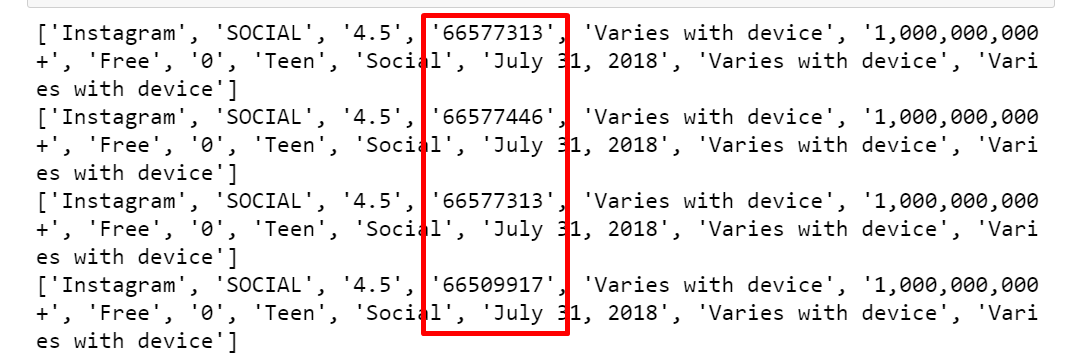

In [12]:
reviews_max = {}
for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
    

In [13]:
print("Expected number : ", len(android) - 1181)
print('Number found: ', len(reviews_max))

Expected number :  9659
Number found:  9659


### Part 2


- Lets sort our dataset from duplicate apps with selection criteria as the maximum number of reviews for a duplicate app.

In [14]:
android_clean= []
already_added = []
for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(app)
        already_added.append(name)


**Let's check sorted data!**

In [15]:
print(len(android_clean))


9659


In [16]:
duplicate_apps = []
unique_apps = []

for app in android_clean:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('The number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps: ', duplicate_apps[:15])

The number of duplicate apps:  0


Examples of duplicate apps:  []


## Foreign language apps


- To check wether the app is for English audience we check the ASCCII number. Characters used in English are in 0-127 range. Those charaters which ASCII number is higher than 127 are considered foreign. 
- The function below return True if the string input is English and False if it is foreign.

In [17]:
def belong_english(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True
print(belong_english('Instagram'))
print(belong_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(belong_english('Docs To Go™ Free Office Suite'))
print(belong_english('Instachat 😜'))

True
False
False
False


- Emojis and character like `™` fall outside of our range and our function can count it as foreign. To minimize the loss the function we look if the string has more than 3 'foreign' characters it would return False. Otherwise - True.
- Updated function:

In [18]:

def belong_english(string):
    count_non_english = 0
    for character in string:
        if ord(character) > 127:
            count_non_english += 1
    if count_non_english > 3:
        return False
    return True

print(belong_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(belong_english('Docs To Go™ Free Office Suite'))
print(belong_english('Instachat 😜'))

False
True
True


In [19]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if belong_english(name):
        android_english.append(app)
for app in apple:
    name = app[1]
    if belong_english(name):
        ios_english.append(app)
        

In [20]:
final_android = []
final_apple = []

for app in android_english:
    price = app[7]
    if price == '0':
        final_android.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        final_apple.append(app)
        
        
        
        
# Printing a sample of final_android list of list
for app in final_android[-15:]:
    print(app[0], app[7])
    
    
print('\n \n')
    
    
# Printing a sample of final_apple list of list
        
for app in final_apple[-15:]:
    print(app[1], app[4])
    
    

        
# print(free_apps_android)

Frim: get new friends on local chat rooms 0
Fr Agnel Ambarnath 0
Manga-FR - Anime Vostfr 0
Bulgarian French Dictionary Fr 0
News Minecraft.fr 0
payermonstationnement.fr 0
FR Tides 0
Chemin (fr) 0
FR Calculator 0
FR Forms 0
Sya9a Maroc - FR 0
Fr. Mike Schmitz Audio Teachings 0
Parkinson Exercices FR 0
The SCP Foundation DB fr nn5n 0
iHoroscope - 2018 Daily Horoscope & Astrology 0

 

bit-tube - Live Stream Video Chat 0.0
Escape from the Bears of the student council room. 0.0
When you clear one,million yen CHANCE!! 0.0
Escape a Halloween Candy Shop 0.0
謎解き2016 0.0
ImpossibleGO! - You can't clear 0.0
机でGOLF 0.0
Reversi REAL - Multiplayer Board game 0.0
和我信 0.0
針の穴 0.0
Tchapper Messenger - Keep it private 0.0
Golden Lotus Slots 0.0
Shark Boom - Challenge Friends with your Pet 0.0
Go!Go!Cat! 0.0
Suppin Detective: Expose their true visage! 0.0


In [21]:
print(len(apple), '- Before cleaning')
print('VS')
print(len(final_apple), " - After cleaning")

7197 - Before cleaning
VS
3222  - After cleaning


In [22]:
print(len(android), '- Before cleaning')
print('VS')
print(len(final_android), " - After cleaning")

10840 - Before cleaning
VS
8864  - After cleaning


- To minimize risks and overhead, our validation strategy for an app idea has three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.
- Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

In [23]:
def freq_table(dataset, index):
    table = {}
    total = 0
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1

    table_percentages ={}
    for key in table:
        percent = (table[key]/total) * 100
        table_percentages[key] = percent

    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        


display_table(final_apple, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


In [24]:
display_table(final_android, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

In [25]:
display_table(final_android, -4)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

## Most Popular Apps by Genre on the App Store
One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the ``Installs` column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the ``rating_count_tot`` app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [26]:
apple_genres = freq_table(final_apple, -5)

for genre in apple_genres:
    total = 0
    len_genre = 0
    for app in final_apple:
        app_genre = app[-5]
        
        if app_genre ==  genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_rating = total / len_genre
    print(genre, ": ", avg_n_rating)
            
            

Social Networking :  71548.34905660378
Photo & Video :  28441.54375
Games :  22788.6696905016
Music :  57326.530303030304
Reference :  74942.11111111111
Health & Fitness :  23298.015384615384
Weather :  52279.892857142855
Utilities :  18684.456790123455
Travel :  28243.8
Shopping :  26919.690476190477
News :  21248.023255813954
Navigation :  86090.33333333333
Lifestyle :  16485.764705882353
Entertainment :  14029.830708661417
Food & Drink :  33333.92307692308
Sports :  23008.898550724636
Book :  39758.5
Finance :  31467.944444444445
Education :  7003.983050847458
Productivity :  21028.410714285714
Business :  7491.117647058823
Catalogs :  4004.0
Medical :  612.0


In [27]:
android_genres = freq_table(final_android, 1)
android_genres

{'ART_AND_DESIGN': 0.6430505415162455,
 'AUTO_AND_VEHICLES': 0.9250902527075812,
 'BEAUTY': 0.5979241877256317,
 'BOOKS_AND_REFERENCE': 2.1435018050541514,
 'BUSINESS': 4.591606498194946,
 'COMICS': 0.6204873646209386,
 'COMMUNICATION': 3.2378158844765346,
 'DATING': 1.861462093862816,
 'EDUCATION': 1.1620036101083033,
 'ENTERTAINMENT': 0.9589350180505415,
 'EVENTS': 0.7107400722021661,
 'FINANCE': 3.7003610108303246,
 'FOOD_AND_DRINK': 1.2409747292418771,
 'HEALTH_AND_FITNESS': 3.0798736462093865,
 'HOUSE_AND_HOME': 0.8235559566787004,
 'LIBRARIES_AND_DEMO': 0.9363718411552346,
 'LIFESTYLE': 3.9034296028880866,
 'GAME': 9.724729241877256,
 'FAMILY': 18.907942238267147,
 'MEDICAL': 3.531137184115524,
 'SOCIAL': 2.6624548736462095,
 'SHOPPING': 2.2450361010830324,
 'PHOTOGRAPHY': 2.944494584837545,
 'SPORTS': 3.395758122743682,
 'TRAVEL_AND_LOCAL': 2.33528880866426,
 'TOOLS': 8.461191335740072,
 'PERSONALIZATION': 3.3167870036101084,
 'PRODUCTIVITY': 3.892148014440433,
 'PARENTING': 0.6

In [55]:
for app in final_apple:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [ ]:
for app in final_apple:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

### Finding average number of installs per genre to find most popular ones

In [63]:
from operator import itemgetter
android_category = freq_table(final_android, 1)
android_category
i_genre = {}
for category in android_category:
    total = 0
    len_category = 0
    for app in final_android:
        category_app = app[1]
        if category_app  == category:
            n_installs = app[5]
            n_installs = n_installs.replace('+', '')
            n_installs = float(n_installs.replace(',', ''))
            total += n_installs
            len_category += 1
    avg_n_installs = total /len_category
    i_genre[category] = avg_n_installs
i_genre

#Sort our dictionary to 
for k, v in sorted(i_genre.items(), key=itemgetter(1), reverse = True):
    print (k,": ", v)
#     print(category, " : ", round(avg_n_installs,1))

COMMUNICATION :  38456119.167247385
VIDEO_PLAYERS :  24727872.452830188
SOCIAL :  23253652.127118643
PHOTOGRAPHY :  17840110.40229885
PRODUCTIVITY :  16787331.344927534
GAME :  15588015.603248259
TRAVEL_AND_LOCAL :  13984077.710144928
ENTERTAINMENT :  11640705.88235294
TOOLS :  10801391.298666667
NEWS_AND_MAGAZINES :  9549178.467741935
BOOKS_AND_REFERENCE :  8767811.894736841
SHOPPING :  7036877.311557789
PERSONALIZATION :  5201482.6122448975
WEATHER :  5074486.197183099
HEALTH_AND_FITNESS :  4188821.9853479853
MAPS_AND_NAVIGATION :  4056941.7741935486
FAMILY :  3695641.8198090694
SPORTS :  3638640.1428571427
ART_AND_DESIGN :  1986335.0877192982
FOOD_AND_DRINK :  1924897.7363636363
EDUCATION :  1833495.145631068
BUSINESS :  1712290.1474201474
LIFESTYLE :  1437816.2687861272
FINANCE :  1387692.475609756
HOUSE_AND_HOME :  1331540.5616438356
DATING :  854028.8303030303
COMICS :  817657.2727272727
AUTO_AND_VEHICLES :  647317.8170731707
LIBRARIES_AND_DEMO :  638503.734939759
PARENTING :  54

In [68]:
for app in final_android:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

- The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [70]:
for app in final_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [73]:
for app in final_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

#  Conclusions
In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.